In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [11]:
# 1, initialize data
df = pd.DataFrame({
    'beta': np.random.beta(5, 1, 1000)*60,
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),
})
df

,beta,exponential,normal_p,normal_l
0,56.256313,25.938765,7.235427,11.957011
1,59.929568,8.458101,8.512584,-2.201857
2,40.434563,3.388331,7.803367,-3.550391
3,48.518707,13.703559,12.493078,17.376591
4,56.902136,9.312277,9.675952,7.316331
...,...,...,...,...
995,47.894362,10.753342,8.876543,-14.184305
996,55.571712,11.149295,9.717112,16.370705
997,49.160456,0.292120,8.570772,-4.686497
998,41.325957,10.450111,10.200341,22.089027


In [12]:
# more data is generated according to binomial distribution
first_half = np.random.normal(20,3,500)
second_half = np.random.normal(-20,3,500)
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [13]:
df

,beta,exponential,normal_p,normal_l,bimodal
0,56.256313,25.938765,7.235427,11.957011,21.295517
1,59.929568,8.458101,8.512584,-2.201857,25.259134
2,40.434563,3.388331,7.803367,-3.550391,16.608315
3,48.518707,13.703559,12.493078,17.376591,21.179396
4,56.902136,9.312277,9.675952,7.316331,20.806517
...,...,...,...,...,...
995,47.894362,10.753342,8.876543,-14.184305,-24.982709
996,55.571712,11.149295,9.717112,16.370705,-17.899635
997,49.160456,0.292120,8.570772,-4.686497,-17.973338
998,41.325957,10.450111,10.200341,22.089027,-18.450040


<Axes: ylabel='Density'>

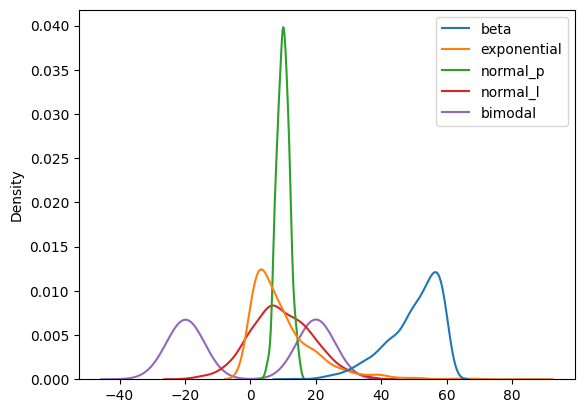

In [15]:
# data visuallization ganerated

sns.kdeplot(data = df)

In [16]:
# show statistics on ganerated data

df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.940692,10.063511,10.005808,9.548473,0.047067
std,8.247115,10.198061,1.933445,9.501145,20.214281
min,13.295566,0.002226,4.043846,-19.185887,-30.327093
25%,45.191856,2.876294,8.658003,3.110250,-19.765989
50%,51.991985,7.186362,9.991583,8.836161,0.530515
75%,56.533621,14.075827,11.300304,16.133986,20.034344
max,59.994615,84.530302,15.549624,38.033149,29.117116


<Axes: ylabel='Density'>

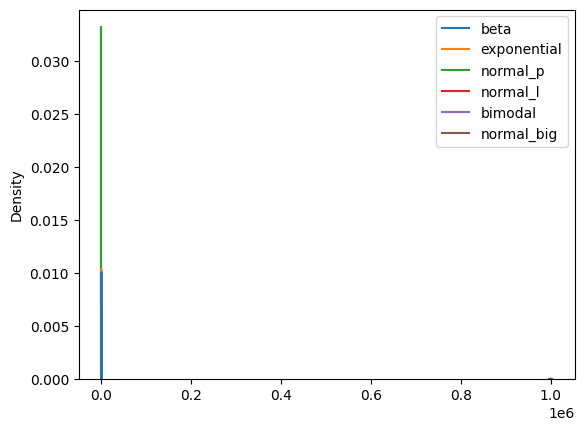

In [17]:
# add a feature with a much learger value

normal_big = np.random.normal(1000000, 1000, (1000,1))
df['normal_big'] = normal_big
sns.kdeplot(data = df)

<Axes: >

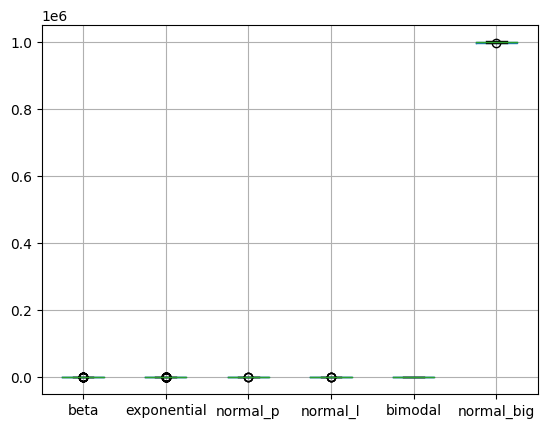

In [18]:
# visuallization using box plots
df.boxplot()

In [20]:
# decalre the StandardScaler

s_scaler = StandardScaler()
s_scaler

StandardScaler()

In [22]:
# normalize data in df with StandardScaler

df_s = s_scaler.fit_transform(df)
df_s

array([[ 0.76618079,  1.55747231, -1.43359003,  0.25362664,  1.05168631,
         1.43149185],
       [ 1.21180246, -0.15750191, -0.77269891, -1.23734659,  1.24786445,
        -0.04390931],
       [-1.15323778, -0.65488139, -1.13969783, -1.37935147,  0.8196945 ,
         1.33997761],
       ...,
       [-0.0946545 , -0.95864112, -0.74258844, -1.49898697, -0.89191509,
         0.07988175],
       [-1.04509819,  0.03792811,  0.10066512,  1.32055964, -0.9155093 ,
         0.42353762],
       [ 0.40073794, -0.24555941, -1.19176183,  0.2051464 , -0.99702335,
         1.61134088]])

In [27]:
# get column list

col_name = list(df.columns)
col_name

['beta', 'exponential', 'normal_p', 'normal_l', 'bimodal', 'normal_big']

In [30]:
# switch back to dataframe, assign columns of df to normalizerd data

df_s = pd.DataFrame(df_s, columns = col_name)
df_s

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.766181,1.557472,-1.433590,0.253627,1.051686,1.431492
1,1.211802,-0.157502,-0.772699,-1.237347,1.247864,-0.043909
2,-1.153238,-0.654881,-1.139698,-1.379351,0.819694,1.339978
3,-0.172508,0.357114,1.287089,0.824325,1.045939,0.552608
4,0.844529,-0.073701,-0.170691,-0.235052,1.027483,0.544221
...,...,...,...,...,...,...
995,-0.248251,0.067677,-0.584361,-2.499136,-1.238842,0.989907
996,0.683128,0.106523,-0.149392,0.718402,-0.888267,-0.712047
997,-0.094655,-0.958641,-0.742588,-1.498987,-0.891915,0.079882
998,-1.045098,0.037928,0.100665,1.320560,-0.915509,0.423538


<Axes: ylabel='Density'>

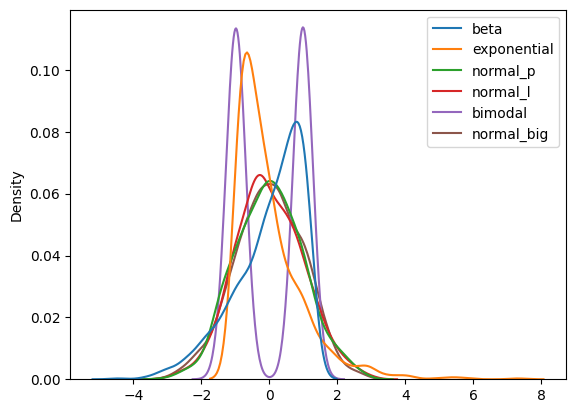

In [31]:
# normalized data representation

sns.kdeplot(data = df_s)

In [32]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-6.394885e-17,-8.526513e-17,6.572520e-17,-1.243450e-17,-1.136868e-16,1.217231e-13
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.445610e+00,-9.870818e-01,-3.085138e+00,-3.025818e+00,-1.503361e+00,-3.037007e+00
25%,-5.761059e-01,-7.051158e-01,-6.974490e-01,-6.779651e-01,-9.806418e-01,-6.928179e-01
50%,2.488531e-01,-2.822683e-01,-7.360808e-03,-7.500872e-02,2.392813e-02,1.727361e-02
75%,7.998224e-01,3.936359e-01,6.698635e-01,6.934751e-01,9.892649e-01,7.172982e-01
max,1.219694e+00,7.305708e+00,2.868761e+00,2.999526e+00,1.438814e+00,2.798512e+00


<Axes: >

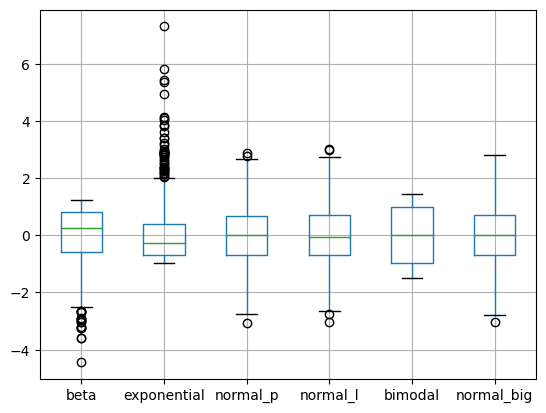

In [33]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()